In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xgi

from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

import seaborn as sb

sb.set_theme(style="ticks", context="paper")

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "Times New Roman"

## Figure 3A

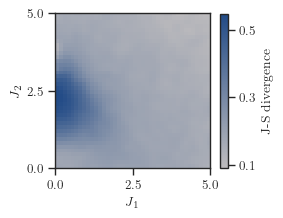

In [2]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))

J1s = np.around(np.linspace(0.1, 5, 40), 2)
J2s = np.around(np.linspace(0.1, 5, 40), 2)
res = np.load("do_info_js_J1_J2_ising_big.npy").transpose()
res_g = gaussian_filter(res, sigma=1)

cmap = LinearSegmentedColormap.from_list("MyMap", ["#bebcbeff", "#224b87"])

im = ax.imshow(
    res_g,
    cmap=cmap,
    origin="lower",
    extent=[0, 5, 0, 5],
)

ax.set_xlabel(r"$J_1$")
ax.set_ylabel(r"$J_2$")

ax.set_xticks([0, 2.5, 5])
ax.set_yticks([0, 2.5, 5])

plt.colorbar(im, shrink=0.8, ticks=[0.1, 0.3, 0.5], label="J-S divergence")

plt.show()

## Figure 3B

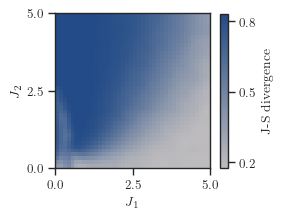

In [3]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))

lambda1s = np.around(np.linspace(0.1, 10, 40), 2)
lambda2s = np.around(np.linspace(0.1, 10, 40), 2)
res = np.load("do_info_ising_js_l1_l2_40.npy").transpose()
res_g = gaussian_filter(res, sigma=1)

cmap = LinearSegmentedColormap.from_list("MyMap", ["#bebcbeff", "#224b87"])

im = ax.imshow(
    res_g,
    cmap=cmap,
    origin="lower",
    extent=[0, 5, 0, 5],
)

ax.set_xlabel(r"$J_1$")
ax.set_ylabel(r"$J_2$")

ax.set_xticks([0, 2.5, 5])
ax.set_yticks([0, 2.5, 5])

plt.colorbar(im, shrink=0.8, ticks=[0.2, 0.5, 0.8], label="J-S divergence")

plt.show()

## Figure 3C

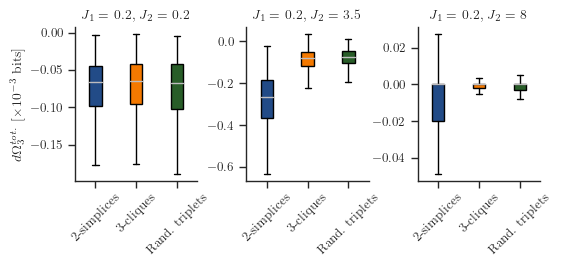

In [9]:
J1 = 0.2
J2s = [0.2, 3.5, 8]
T = 6
N = 200

boxprops = dict(linewidth=3)  # Customize the box properties
whiskerprops = dict(linewidth=3)  # Customize the whisker properties
medianprops = dict(linewidth=1, color="#bebcbeff")  # Customize the median props
capprops = dict(linewidth=3)  # Customize the caps props
colors = ["#224b87", "#f47900", "#285d28"]

fig, axs = plt.subplots(1, 3, figsize=(6, 2), sharey=False)


for i, J2 in enumerate(J2s):
    ax = axs[i]

    file_name = (
        f"./ising_results/ising_J1_{J1}_J2_{J2}_T_{T}_N_{N}_dOinfo_two_simplices.npy"
    )
    two_simplices_lin = np.load(file_name)

    file_name = (
        f"./ising_results/ising_J1_{J1}_J2_{J2}_T_{T}_N_{N}_dOinfo_three_cliques.npy"
    )
    three_cliques_lin = np.load(file_name)

    file_name = (
        f"./ising_results/ising_J1_{J1}_J2_{J2}_T_{T}_N_{N}_dOinfo_random_triplets.npy"
    )
    random_triplets_lin = np.load(file_name)

    # plot boxplots
    bplot = ax.boxplot(
        [
            two_simplices_lin * 1000,
            three_cliques_lin * 1000,
            random_triplets_lin * 1000,
        ],
        labels=["2-simplices", "3-cliques", "Rand. triplets"],
        showfliers=False,
        patch_artist=True,
        # boxprops=boxprops,
        # whiskerprops=whiskerprops,
        medianprops=medianprops,
        # capprops=capprops
    )
    for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)
    axs[i].set_title(r"$J_1 = $ " + str(J1) + r", $J_2 = $ " + str(J2))
    axs[i].set_ylabel(r"$d\Omega_3^{tot.}$ [$\times 10^{-3}$ bits]")


axs[1].set_ylabel("")
axs[2].set_ylabel("")
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


plt.subplots_adjust(wspace=0.4)

sb.despine()

## Figure 3D

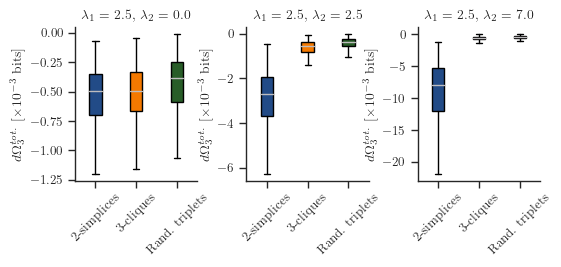

In [16]:
lambdas = [(2.5, 0.0), (2.5, 2.5), (2.5, 7.0)]

import pickle

fig, axs = plt.subplots(1, 3, figsize=(6, 2), sharey=False)

plt.rcParams["text.usetex"] = True  # TeX rendering

medianprops = dict(linewidth=1, color="#bebcbeff")  # Customize the median props
colors = ["#224b87", "#f47900", "#285d28"]

colors = ["#224b87", "#f47900", "#285d28"]

for i, l in enumerate(lambdas):
    ax = axs[i]

    with open("./simplagion_results/frequency_O_info_simplices.pickle", "rb") as handle:
        frequency_O_info_simplices = pickle.load(handle)
    with open("./simplagion_results/frequency_O_info_cliques.pickle", "rb") as handle:
        frequency_O_info_cliques = pickle.load(handle)
    with open("./simplagion_results/frequency_O_info_triplets.pickle", "rb") as handle:
        frequency_O_info_triplets = pickle.load(handle)

    # plot boxplots
    bplot = ax.boxplot(
        [
            np.array(list(frequency_O_info_simplices[l].values())) * 1000,
            np.array(list(frequency_O_info_cliques[l].values())) * 1000,
            np.array(list(frequency_O_info_triplets[l].values())) * 1000,
        ],
        labels=["2-simplices", "3-cliques", "Rand. triplets"],
        showfliers=False,
        patch_artist=True,
        medianprops=medianprops,
    )
    for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)
    axs[i].set_ylabel(r"$d\Omega_3^{tot.}$ [$\times 10^{-3}$ bits]")
    axs[i].set_title(r"$\lambda_1 = $ " + str(l[0]) + r", $\lambda_2 = $ " + str(l[1]))
    axs[i].tick_params(axis="x", which="major")
    axs[i].tick_params(axis="y", which="major")
    axs[i].locator_params(axis="y")
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.4)

sb.despine()

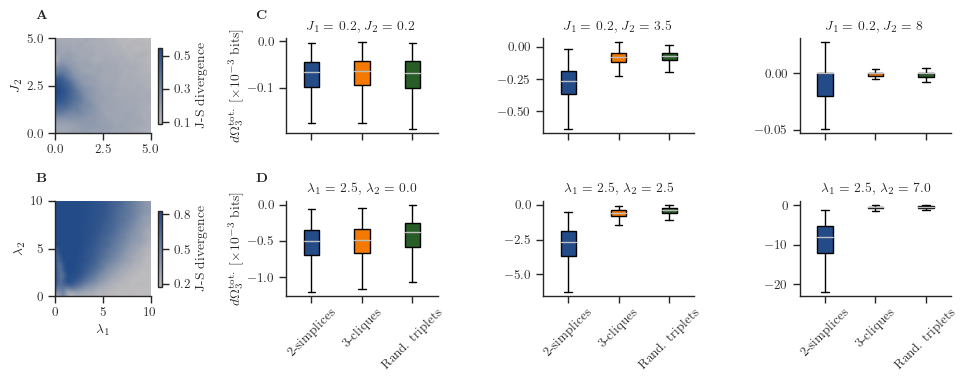

In [17]:
fig, axs = plt.subplots(2, 4, figsize=(10, 4))

## first heatmap

J1s = np.around(np.linspace(0.1, 5, 40), 2)
J2s = np.around(np.linspace(0.1, 5, 40), 2)
res = np.load("do_info_js_J1_J2_ising_big.npy").transpose()
res_g = gaussian_filter(res, sigma=1)

cmap = LinearSegmentedColormap.from_list("MyMap", ["#bebcbeff", "#224b87"])

im1 = axs[0, 0].imshow(
    res_g,
    cmap=cmap,
    origin="lower",
    extent=[0, 5, 0, 5],
)

# axs[0, 0].set_xlabel(r"$J_1$")
axs[0, 0].set_ylabel(r"$J_2$")

axs[0, 0].set_xticks([0, 2.5, 5])
axs[0, 0].set_yticks([0, 2.5, 5])


# second heatmap


lambda1s = np.around(np.linspace(0.1, 10, 40), 2)
lambda2s = np.around(np.linspace(0.1, 10, 40), 2)
res = np.load("do_info_ising_js_l1_l2_40.npy").transpose()
res_g = gaussian_filter(res, sigma=1)

cmap = LinearSegmentedColormap.from_list("MyMap", ["#bebcbeff", "#224b87"])

im2 = axs[1, 0].imshow(
    res_g,
    cmap=cmap,
    origin="lower",
    extent=[0, 10, 0, 10],
)

axs[1, 0].set_xlabel(r"$\lambda_1$")
axs[1, 0].set_ylabel(r"$\lambda_2$")

axs[1, 0].set_xticks([0, 5, 10])
axs[1, 0].set_yticks([0, 5, 10])


## first boxplots

J1 = 0.2
J2s = [0.2, 3.5, 8]
T = 6
N = 200

boxprops = dict(linewidth=3)  # Customize the box properties
whiskerprops = dict(linewidth=3)  # Customize the whisker properties
medianprops = dict(linewidth=1, color="#bebcbeff")  # Customize the median props
capprops = dict(linewidth=3)  # Customize the caps props
colors = ["#224b87", "#f47900", "#285d28"]


for i, J2 in enumerate(J2s):
    ax = axs[0, i + 1]

    file_name = (
        f"./ising_results/ising_J1_{J1}_J2_{J2}_T_{T}_N_{N}_dOinfo_two_simplices.npy"
    )
    two_simplices_lin = np.load(file_name)

    file_name = (
        f"./ising_results/ising_J1_{J1}_J2_{J2}_T_{T}_N_{N}_dOinfo_three_cliques.npy"
    )
    three_cliques_lin = np.load(file_name)

    file_name = (
        f"./ising_results/ising_J1_{J1}_J2_{J2}_T_{T}_N_{N}_dOinfo_random_triplets.npy"
    )
    random_triplets_lin = np.load(file_name)

    # plot boxplots
    bplot = ax.boxplot(
        [
            two_simplices_lin * 1000,
            three_cliques_lin * 1000,
            random_triplets_lin * 1000,
        ],
        labels=["2-simplices", "3-cliques", "Rand. triplets"],
        showfliers=False,
        patch_artist=True,
        # boxprops=boxprops,
        # whiskerprops=whiskerprops,
        medianprops=medianprops,
        # capprops=capprops
    )
    for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)
    ax.set_title(r"$J_1 = $ " + str(J1) + r", $J_2 = $ " + str(J2))
axs[0, 1].set_ylabel(r"$d\Omega_3^{\mathrm{tot.}}$ [$\times 10^{-3}$ bits]")


# axs[0, 2].set_ylabel("")
# axs[0, 3].set_ylabel("")
for ax in axs[0, 1:]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xticklabels([])


## second boxplots

lambdas = [(2.5, 0.0), (2.5, 2.5), (2.5, 7.0)]

import pickle

for i, l in enumerate(lambdas):
    ax = axs[1, i + 1]

    with open("./simplagion_results/frequency_O_info_simplices.pickle", "rb") as handle:
        frequency_O_info_simplices = pickle.load(handle)
    with open("./simplagion_results/frequency_O_info_cliques.pickle", "rb") as handle:
        frequency_O_info_cliques = pickle.load(handle)
    with open("./simplagion_results/frequency_O_info_triplets.pickle", "rb") as handle:
        frequency_O_info_triplets = pickle.load(handle)

    # plot boxplots
    bplot = ax.boxplot(
        [
            np.array(list(frequency_O_info_simplices[l].values())) * 1000,
            np.array(list(frequency_O_info_cliques[l].values())) * 1000,
            np.array(list(frequency_O_info_triplets[l].values())) * 1000,
        ],
        labels=["2-simplices", "3-cliques", "Rand. triplets"],
        showfliers=False,
        patch_artist=True,
        # boxprops=boxprops,
        # whiskerprops=whiskerprops,
        medianprops=medianprops,
        # capprops=capprops
    )
    for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)
    ax.set_title(r"$\lambda_1 = $ " + str(l[0]) + r", $\lambda_2 = $ " + str(l[1]))
axs[1, 1].set_ylabel(r"$d\Omega_3^{\mathrm{tot.}}$ [$\times 10^{-3}$ bits]")

# axs[1, 2].set_ylabel("")
# axs[1, 3].set_ylabel("")
for ax in axs[1, 1:]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# plt.subplots_adjust(wspace=0.5)
sb.despine()

pos1 = axs[0, 0].get_position()  # get the original position
pos2 = [pos1.x0 - 0.03, pos1.y0, pos1.width, pos1.height]
axs[0, 0].set_position(pos2)  # set a new position

axs[0, 0].annotate(r"$\bf{A}$", (-0.2, 1.2), xycoords="axes fraction")
axs[1, 0].annotate(r"$\bf{B}$", (-0.2, 1.2), xycoords="axes fraction")
axs[0, 1].annotate(r"$\bf{C}$", (-0.2, 1.2), xycoords="axes fraction")
axs[1, 1].annotate(r"$\bf{D}$", (-0.2, 1.2), xycoords="axes fraction")


plt.colorbar(
    im1, ax=axs[0, 0], shrink=0.8, ticks=[0.1, 0.3, 0.5], label="J-S divergence"
)
plt.colorbar(
    im2, ax=axs[1, 0], shrink=0.8, ticks=[0.2, 0.5, 0.8], label="J-S divergence"
)

fig.tight_layout()

plt.savefig("./figures/figure3_draft.pdf", dpi=600, bbox_inches="tight")

# plt.show()